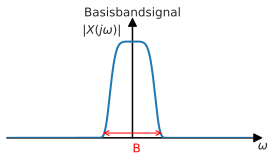

In [1]:
import matplotlib.pyplot as plt
import helpers
import numpy as np
import os, sys

sys.path.append(os.path.abspath('./comm'))
import skcomm as skc

plt.style.use('noelle.mplstyle')
f_width = 4
plt.rcParams["figure.figsize"] = (f_width,f_width/1.62)
%config InlineBackend.figure_format = 'svg'

sr = 1e3
t = skc.utils.create_time_axis(sample_rate=sr, n_samples=sr)
sig = helpers.gen_time_signal(sr=sr, T=1)
spec = helpers.gen_generic_freq_signal(n=len(t))
spec = np.concatenate((np.zeros(spec.size),spec,np.zeros(spec.size)))

# plotting
n_row = 1
n_col = 1
fig_size = [i*j for i,j in zip(plt.rcParams['figure.figsize'], [n_col, n_row])]
fig, axs = plt.subplots(figsize=fig_size, nrows=n_row, ncols=n_col,squeeze=False)

f = np.fft.fftshift(np.fft.fftfreq(n=spec.size,d=1/sr))
axs[0][0].plot(f,spec,lw=2)
axs[0][0].set(title='Basisbandsignal',ylim=(0,1.2),xlim=(-500,500))
axs[0][0].annotate('',(-125,0.05),xytext=(125,0.05),xycoords='data',arrowprops={'arrowstyle':'<->','color':'r'})
axs[0][0].text(0,-0.15,'B',color='r')
helpers.plot_as_arrows(axs[0][0], xlabel=('$\omega$',1.0,-0.1), ylabel=('$|X(j\omega)|$',0.3,0.9))

plt.tight_layout()
plt.show()



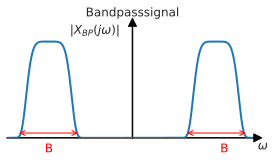

In [2]:
spec = helpers.gen_generic_freq_signal(n=len(t))
spec = np.concatenate((spec,np.zeros(spec.size),spec))

# plotting
n_row = 1
n_col = 1
fig_size = [i*j for i,j in zip(plt.rcParams['figure.figsize'], [n_col, n_row])]
fig, axs = plt.subplots(figsize=fig_size, nrows=n_row, ncols=n_col,squeeze=False)

f = np.fft.fftshift(np.fft.fftfreq(n=spec.size,d=1/sr))
axs[0][0].plot(f, spec,lw=2)
axs[0][0].set(title='Bandpasssignal',ylim=(0,1.2),xlim=(-500,500))
helpers.plot_as_arrows(axs[0][0], xlabel=('$\omega$',1.0,-0.1), ylabel=('$|X_{BP}(j\omega)|$',0.25,0.9))
axs[0][0].annotate('',(-460,0.05),xytext=(-210,0.05),xycoords='data',arrowprops={'arrowstyle':'<->','color':'r'})
axs[0][0].text(-350,-0.15,'B',color='r')
axs[0][0].annotate('',(460,0.05),xytext=(210,0.05),xycoords='data',arrowprops={'arrowstyle':'<->','color':'r'})
axs[0][0].text(350,-0.15,'B',color='r')


plt.tight_layout()
plt.show()

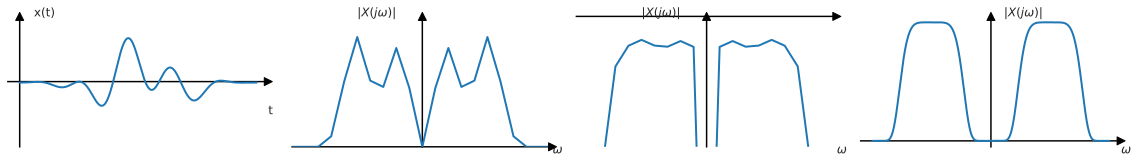

In [4]:
# TESTS
sr = 1e3
t = skc.utils.create_time_axis(sample_rate=sr, n_samples=sr)
sig = helpers.gen_time_signal(sr=sr, T=1)
spec = helpers.gen_generic_freq_signal(n=len(t))

# plotting
n_row = 1
n_col = 4
fig_size = [i*j for i,j in zip(plt.rcParams['figure.figsize'], [n_col, n_row])]
fig, axs = plt.subplots(figsize=fig_size, nrows=n_row, ncols=n_col,squeeze=False)

axs[0][0].plot(t,sig,lw=2)
axs[0][0].set(ylim=(-1.5,1.5))
helpers.plot_as_arrows(axs[0][0], xlabel=('t',1,0.25), ylabel=('x(t)',0.1,1))

axs[0][1].plot(np.fft.fftshift(np.fft.fftfreq(n=sig.size,d=1/sr)),(np.abs(np.fft.fftshift(np.fft.fft(sig))/sig.size)))
axs[0][1].set(xlim=(-10,10),ylim=(0,0.15))
helpers.plot_as_arrows(axs[0][1], xlabel=('$\omega$',1,-0.05), ylabel=('$|X(j\omega)|$',0.25,1))

axs[0][2].plot(np.fft.fftshift(np.fft.fftfreq(n=sig.size,d=1/sr)),20*np.log10(np.abs(np.fft.fftshift(np.fft.fft(sig))/sig.size)))
axs[0][2].set(xlim=(-10,10),ylim=(-100,0))
helpers.plot_as_arrows(axs[0][2], xlabel=('$\omega$',1,-0.05), ylabel=('$|X(j\omega)|$',0.25,1))

spec = np.concatenate((spec,spec))
f = np.fft.fftshift(np.fft.fftfreq(n=spec.size,d=1/sr))
axs[0][3].plot(f, spec,lw=2)
helpers.plot_as_arrows(axs[0][3], xlabel=('$\omega$',1.0,-0.05), ylabel=('$|X(j\omega)|$',0.55,1))

plt.tight_layout()
plt.show()
